In [63]:
import mglearn

In [68]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

In [69]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

### 일반 회귀 모델 살펴보기

In [70]:
boston = load_boston()

In [75]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [83]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [84]:
boston.values()

dict_values([array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 1

In [79]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 단순선형 회귀, 다중선형 회귀

In [21]:
# sel = ['INDUS', 'RM']
sel = df_boston.columns[:-1]
X = df_boston[sel] # 집 값에 영향 주는 
y = df_boston['target'] # 출력

In [22]:
### 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [25]:
# y = (-0.6341 * INDUS)+ (8.16489603*RM) + 29.959
print(model.coef_) # w1
print(model.intercept_) # b

[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
29.83642016383913


In [32]:
ex_X = PolynomialFeatures(degree=2,
         include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성
ex_X.shape

(506, 104)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


### 라쏘(Lasso) - L1, 릿지(Ridge) - L2


In [47]:
import numpy as np

In [48]:
sel = df_boston.columns[:-1]
X = df_boston[sel] # 집 값에 영향 주는 
y = df_boston['target'] # 출력

In [49]:
print(X.shape) # 특징의 개수
X.describe()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [50]:
normalize_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X)  # 데이터 feature 추가 생성

print("정규화, 추가 생성 : ", ex_X.shape, y.shape)
print(np.min(ex_X),np.max(ex_X) )

정규화, 추가 생성 :  (506, 104) (506,)
0.0 1.0


In [51]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [52]:
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.80


C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [53]:
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82


In [ ]:
### 4-5 (추가) 최적의 alpha를 찾아보자.

In [54]:
sel = [10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
for var in sel:
    ridge = Ridge(alpha=var).fit(X_train, y_train)
    print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))
    print()

학습용 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73

학습용 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.76

학습용 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81

학습용 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.82

학습용 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79



In [56]:
sel = [10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
for var in sel:
    lasso = Lasso(alpha=var).fit(X_train, y_train)
    print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
    print()

학습용 데이터 세트 점수 : 0.00
테스트 데이터 세트 점수 : -0.03

학습용 데이터 세트 점수 : 0.00
테스트 데이터 세트 점수 : -0.03

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26

학습용 데이터 세트 점수 : 0.61
테스트 데이터 세트 점수 : 0.58

학습용 데이터 세트 점수 : 0.75
테스트 데이터 세트 점수 : 0.70

학습용 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.80

학습용 데이터 세트 점수 : 0.93
테스트 데이터 세트 점수 : 0.81

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78



C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550250048, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


Linear 학습 :  0.9448313975211594
Linear 테스트 :  0.7758378393351691
Ridge 학습 :  0.8700969775259919
Ridge 테스트 :  0.8145421818415556


(-2000.0, 2000.0)

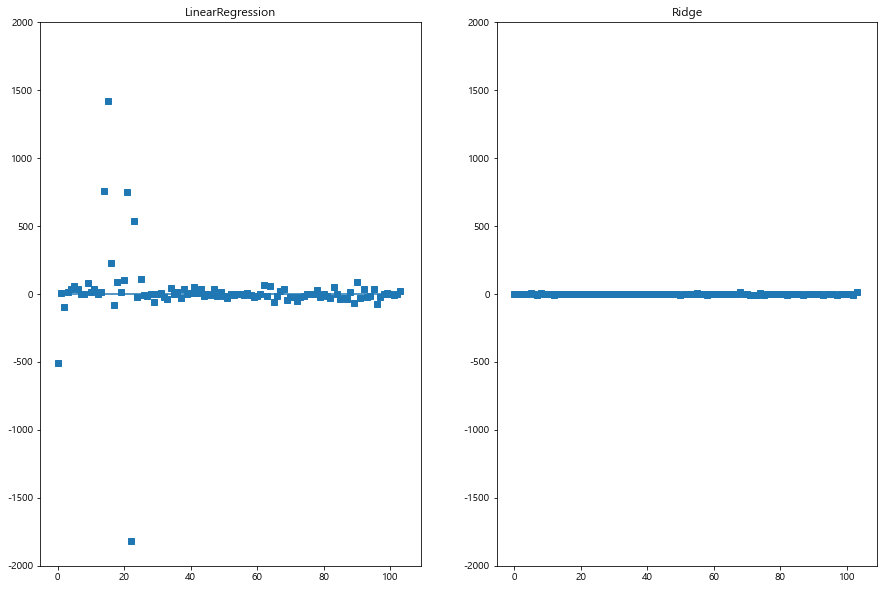

In [61]:
# LinearRegression 
lr = LinearRegression().fit(X_train, y_train)
print("Linear 학습 : ", lr.score(X_train, y_train) )
print("Linear 테스트 : ", lr.score(X_test, y_test) )

# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge().fit(X_train, y_train)
print("Ridge 학습 : ", ridge.score(X_train, y_train) )
print("Ridge 테스트 : ", ridge.score(X_test, y_test) )

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.ylim(-2000,2000)

plt.subplot(1, 2, 2)
plt.hlines(0,0, len(lr.coef_))
plt.plot(ridge.coef_, 's', label="Ridge")
plt.title('Ridge')
plt.ylim(-2000,2000)

In [ ]:
# Ridge - L2규제 : 0에 가깝게 만들지만, 0인 값은 없다.
ridge = Ridge().fit(X_train, y_train)

print('학습:' , ridge.score(X_train, y_train))
print('테스트:' , ridge.score(X_test, y_test))

fig = plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)

In [ ]:
 # 테스트 데이터가 높고 , 학습과의 차이가 많이 나지 않아야 좋은 성능이다.